## Chennai House Price Prediction

## Problem Statement

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

## Data

The historical sale data is available here. The features of the house and the sale price are given in two different datasets - participants must merge them to do further analysis.

## Minimum Requirements

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

#### Import Libraries

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

#### Load the dataset

In [2]:
#loading the dataset
df = pd.read_csv("train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


#### Exploring the dataset

In [3]:
# Exploring the dataset
df.shape

(7109, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,451562.00,983922.00


#### Data Cleaning

##### Handling Missing Values

In [6]:
# Checking the null values in the dataset
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

#### The relationship between missing values and Sales Price

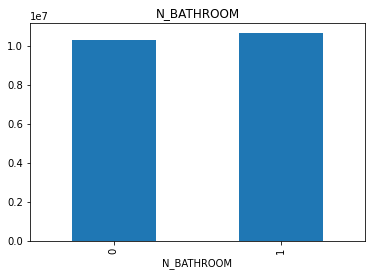

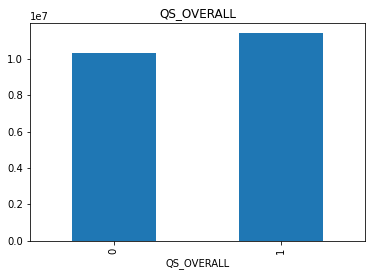

In [7]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SALES_PRICE'].median().plot.bar()
    plt.title(feature)
    plt.show()

#### We need to fill the null values

In [8]:
# Applying mean to the missing values
df = df.fillna({"N_BEDROOM": df["N_BEDROOM"].mean(),"N_BATHROOM": df["N_BATHROOM"].mean(), "QS_OVERALL": df["QS_OVERALL"].mean()})

In [9]:
# Checking the null values in the dataset again
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

#### Detect the duplicates

In [10]:
# To check row wise and detect the duplicate rows
df[df.duplicated()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


#### Therefore its clear that there is no duplicate values

### Exploring the dataset

##### It seems many spell error has occured in this dataset, so I changed it accordingly

In [11]:
df.replace({"Chrompt":"Chrompet","Chrmpet":"Chrompet","Chormpet":"Chrompet","Karapakam":"Karapakkam","KKNagar":'KK Nagar','Velchery':'Velachery','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','TNagar':'T Nagar'},inplace=True)

In [12]:
df.replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'},inplace =True)

In [13]:
df.replace({'Noo':'No'},inplace = True)

In [14]:
df.replace({'Other':'Others','Comercial':'Commercial'},inplace = True)

In [15]:
df.replace({'All Pub':'AllPub','NoSewr':'NoSeWa'},inplace = True)

In [16]:
df.replace({'Pavd':'Paved','NoAccess':'No Access'},inplace = True)

#### Changing the data types in numerical features

In [17]:
#Changing the data types
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)

In [18]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM          int32
N_BATHROOM         int32
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

#### Value Counts

In [19]:
#df.AREA.value_counts()

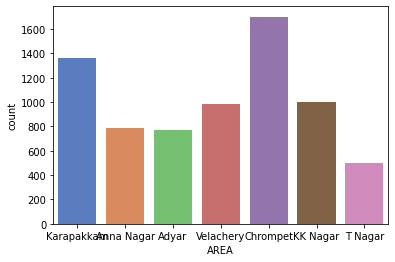

In [20]:
sns.countplot('AREA', data=df, palette = 'muted');

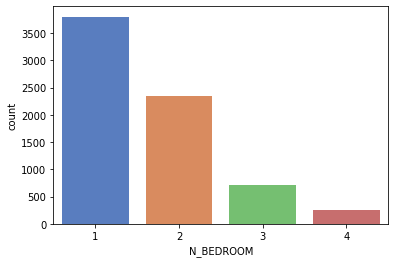

In [21]:
sns.countplot('N_BEDROOM', data=df, palette = 'muted');

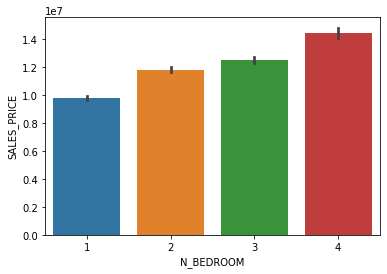

In [22]:
sns.barplot(x=df.N_BEDROOM,y=df.SALES_PRICE);

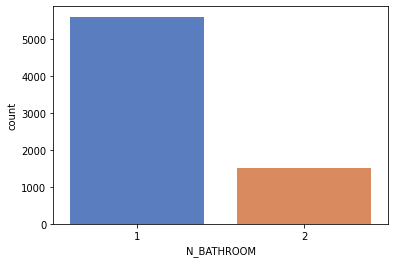

In [23]:
sns.countplot('N_BATHROOM', data=df, palette = 'muted');

##### The graph above seems to be an imbalanced dataset.

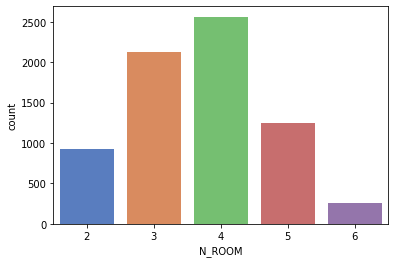

In [24]:
sns.countplot('N_ROOM', data=df, palette = 'muted');

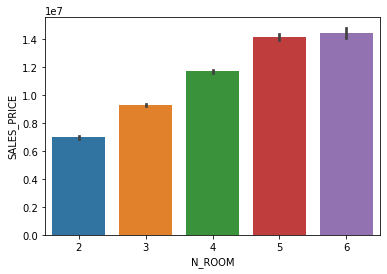

In [25]:
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE);

##### As the above graph indicates that when number of rooms increases price also increases, so we assume that there is a direct relationship between the Number of rooms and price

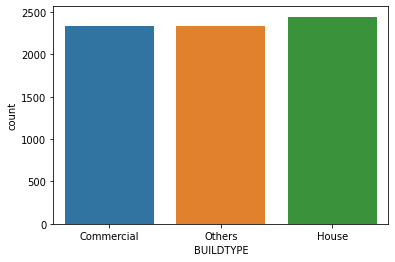

In [26]:
sns.countplot('BUILDTYPE',data = df);

In [27]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [28]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [29]:
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [30]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [31]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [32]:
df.QS_ROOMS.unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

In [33]:
df.QS_BATHROOM.unique()

array([3.9, 4.2, 3.8, 2.5, 2.6, 2.1, 4.5, 3.7, 3.1, 3.2, 3.4, 2.2, 4.6,
       4.9, 2.7, 4.4, 5. , 2.8, 3. , 2.9, 3.6, 4. , 4.3, 2. , 3.3, 4.7,
       2.3, 4.1, 4.8, 3.5, 2.4])

In [34]:
df.QS_BEDROOM.unique()

array([4.9, 2.5, 2.2, 3.6, 4.1, 3.1, 2.1, 4. , 3.3, 4.5, 3.7, 4.8, 4.7,
       2.9, 3.4, 2.8, 3.8, 3. , 3.2, 2. , 4.3, 3.9, 3.5, 2.6, 4.4, 2.4,
       4.6, 5. , 2.3, 2.7, 4.2])

In [35]:
#Changing the data type of date_sale to Datetime
df['Date_N'] = pd.to_datetime(df['DATE_SALE'])

In [36]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE                object
DIST_MAINROAD             int64
N_BEDROOM                 int32
N_BATHROOM                int32
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD               object
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
Date_N           datetime64[ns]
dtype: object

In [37]:
df['Date_N'].dt.year.value_counts()

2010    1341
2011    1300
2009    1122
2008     814
2012     654
2007     651
2013     365
2014     335
2006     253
2004     116
2005     107
2015      51
Name: Date_N, dtype: int64

#### Creating a new feature for year from the given dataset

In [38]:
df['YEAR_SALE'] = df['Date_N'].dt.year

In [39]:
df.head(1)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Date_N,YEAR_SALE
0,P03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.33,380000,144400,7600000,2011-04-05,2011


##### Drop the 'DATE_SALE' , 'Date_N' columns

In [40]:
df.drop(['DATE_SALE','Date_N'],axis = 1,inplace = True)

In [41]:
df.head(1)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SALE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.33,380000,144400,7600000,2011


In [42]:
df.DATE_BUILD

0       15-05-1967
1       22-12-1995
2       09-02-1992
3       18-03-1988
4       13-10-1979
           ...    
7104    15-01-1962
7105    11-04-1995
7106    01-09-1978
7107    11-08-1977
7108    24-07-1961
Name: DATE_BUILD, Length: 7109, dtype: object

#### Creating a new feature with datatype as datetime

In [43]:
df['Date_B'] = pd.to_datetime(df['DATE_BUILD'])

In [44]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DIST_MAINROAD             int64
N_BEDROOM                 int32
N_BATHROOM                int32
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD               object
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
YEAR_SALE                 int64
Date_B           datetime64[ns]
dtype: object

In [45]:
df['Date_B'].dt.year.value_counts()

1985    200
1988    197
2002    194
1990    191
1999    189
       ... 
1954     11
2010      9
1951      6
1949      2
1950      2
Name: Date_B, Length: 62, dtype: int64

### Creating a new feature name Year_Build

In [46]:
df['YEAR_BUILD']= df['Date_B'].dt.year

In [47]:
df.head(1)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SALE,Date_B,YEAR_BUILD
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.33,380000,144400,7600000,2011,1967-05-15,1967


In [48]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'YEAR_SALE', 'Date_B', 'YEAR_BUILD'],
      dtype='object')

In [49]:
df['YEAR_BUILD'].min()

1949

In [50]:
df['YEAR_BUILD'].max()

2010

In [51]:
df['YEAR_SALE'].min()

2004

In [52]:
df['YEAR_SALE'].max()

2015

##### Now we are creating a new feature naming Age by subtracting the year sold from the year_Build

In [53]:
df['AGE']= df['YEAR_SALE']- df['YEAR_BUILD']

In [54]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SALE,Date_B,YEAR_BUILD,AGE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967-05-15,1967,44
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995-12-22,1995,11
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992-09-02,1992,20
3,P05346,Velachery,1855,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988-03-18,1988,22
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979-10-13,1979,30


In [55]:
df['AGE'].min()

3

In [56]:
df['AGE'].max()

55

In [57]:
df.INT_SQFT.mean()

1382.0730060486708

In [58]:
df.INT_SQFT.min()

500

In [59]:
df.INT_SQFT.max()

2500

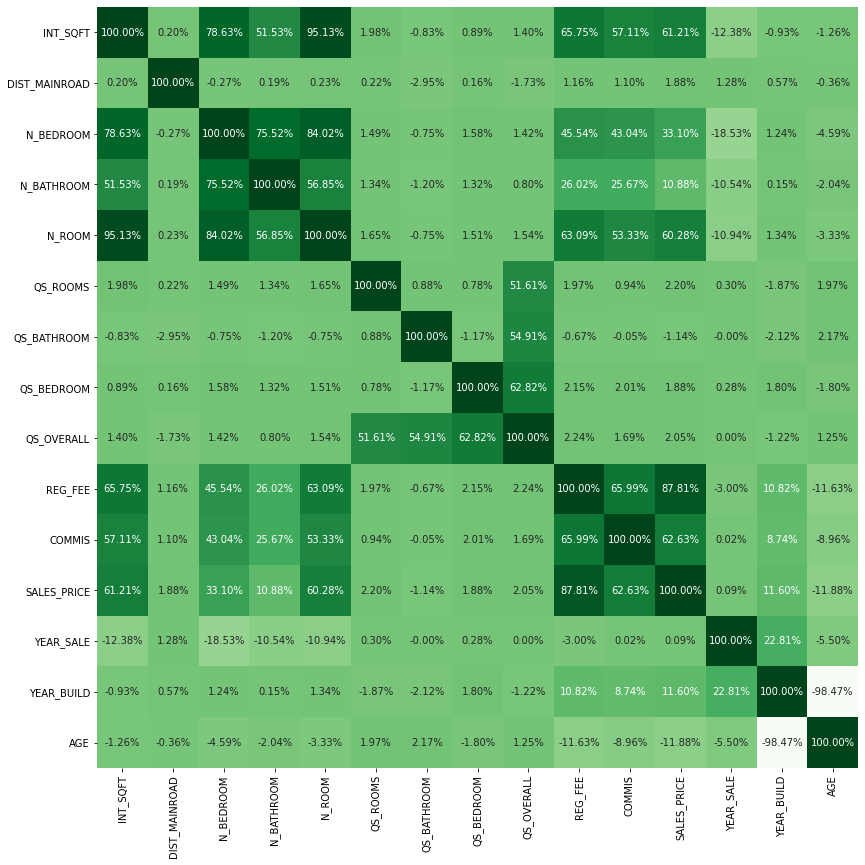

In [60]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens');

##### LABEL ENCODING AND ONE HOT ENCODING

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
df.dropna()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SALE,Date_B,YEAR_BUILD,AGE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967-05-15,1967,44
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995-12-22,1995,11
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992-09-02,1992,20
3,P05346,Velachery,1855,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988-03-18,1988,22
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979-10-13,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1,1,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,2011,1962-01-15,1962,49
7105,P10000,Velachery,1897,52,3,2,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,2004,1995-11-04,1995,9
7106,P09594,Velachery,1614,152,2,1,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,2006,1978-01-09,1978,28
7107,P06508,Karapakkam,787,40,1,1,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,2009,1977-11-08,1977,32


In [63]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SALE,Date_B,YEAR_BUILD,AGE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967-05-15,1967,44
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995-12-22,1995,11
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992-09-02,1992,20
3,P05346,Velachery,1855,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988-03-18,1988,22
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979-10-13,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1,1,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,2011,1962-01-15,1962,49
7105,P10000,Velachery,1897,52,3,2,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,2004,1995-11-04,1995,9
7106,P09594,Velachery,1614,152,2,1,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,2006,1978-01-09,1978,28
7107,P06508,Karapakkam,787,40,1,1,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,2009,1977-11-08,1977,32


In [64]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'YEAR_SALE', 'Date_B', 'YEAR_BUILD', 'AGE'],
      dtype='object')

In [65]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['PARK_FACIL']= label_encoder.fit_transform(df['PARK_FACIL'])
df['STREET']= label_encoder.fit_transform(df['STREET'])
df['BUILDTYPE']= label_encoder.fit_transform(df['BUILDTYPE'])
df['UTILITY_AVAIL']= label_encoder.fit_transform(df['UTILITY_AVAIL'])
df['PRT_ID']= label_encoder.fit_transform(df['PRT_ID'])
 
df['PRT_ID'].unique()

array([2266, 6664, 1270, ..., 6798, 4601, 6942])

In [66]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['AREA', 'SALE_COND','MZZONE'])
one_hot_encoded_data.head()

,PRT_ID,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SALE,Date_B,YEAR_BUILD,AGE,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,2266,1004,131,1,1,3,1,15-05-1967,0,0,2,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967-05-15,1967,44,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,6664,1986,26,2,1,5,0,22-12-1995,0,0,0,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995-12-22,1995,11,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1270,909,70,1,1,3,1,09-02-1992,0,1,0,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992-09-02,1992,20,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,3755,1855,14,3,2,5,0,18-03-1988,2,3,2,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988-03-18,1988,22,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,4393,1226,84,1,1,3,1,13-10-1979,2,0,0,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979-10-13,1979,30,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0


#### FEATURE IMPORTANCE AND FEATURE SELECTION

In [67]:
from sklearn.feature_selection import SelectKBest, chi2
X=one_hot_encoded_data[['PRT_ID','INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL',
                       'REG_FEE','COMMIS','YEAR_SALE','YEAR_BUILD','AGE','AREA_Adyar','AREA_Anna Nagar','AREA_Chrompet','AREA_KK Nagar','AREA_Karapakkam','AREA_T Nagar','AREA_Velachery','SALE_COND_AbNormal','SALE_COND_AdjLand','SALE_COND_Family','SALE_COND_Normal Sale','SALE_COND_Partial','MZZONE_A','MZZONE_C','MZZONE_I','MZZONE_RH','MZZONE_RL','MZZONE_RM']]
y=one_hot_encoded_data['SALES_PRICE']

selector = SelectKBest(chi2, k=10)
selector.fit(X, y)

dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))

              Specs         Score
14          REG_FEE  3.855827e+08
15           COMMIS  3.117780e+08
0            PRT_ID  8.376356e+06
1          INT_SQFT  1.073076e+06
2     DIST_MAINROAD  2.330929e+05
18              AGE  4.423177e+04
24     AREA_T Nagar  6.593810e+03
31         MZZONE_A  6.525666e+03
32         MZZONE_C  6.513761e+03
33         MZZONE_I  6.509525e+03
19       AREA_Adyar  6.312038e+03
20  AREA_Anna Nagar  6.302957e+03
25   AREA_Velachery  6.113507e+03
22    AREA_KK Nagar  6.094174e+03
8     UTILITY_AVAIL  6.049807e+03


In [68]:
one_hot_encoded_data.drop(['PRT_ID','N_ROOM','PARK_FACIL','BUILDTYPE','STREET','QS_ROOMS','QS_BATHROOM',
                               'QS_BEDROOM','QS_OVERALL','YEAR_SALE','YEAR_BUILD','SALE_COND_AbNormal','SALE_COND_AdjLand',
                               'SALE_COND_Family','SALE_COND_Normal Sale','SALE_COND_Partial','MZZONE_RH','MZZONE_RL',
                               'MZZONE_RM'],inplace=True,axis=1)

In [69]:
one_hot_encoded_data.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,DATE_BUILD,UTILITY_AVAIL,REG_FEE,COMMIS,SALES_PRICE,Date_B,AGE,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,MZZONE_A,MZZONE_C,MZZONE_I
0,1004,131,1,1,15-05-1967,0,380000,144400,7600000,1967-05-15,44,0,0,0,0,1,0,0,1,0,0
1,1986,26,2,1,22-12-1995,0,760122,304049,21717770,1995-12-22,11,0,1,0,0,0,0,0,0,0,0
2,909,70,1,1,09-02-1992,1,421094,92114,13159200,1992-09-02,20,1,0,0,0,0,0,0,0,0,0
3,1855,14,3,2,18-03-1988,3,356321,77042,9630290,1988-03-18,22,0,0,0,0,0,0,1,0,0,1
4,1226,84,1,1,13-10-1979,0,237000,74063,7406250,1979-10-13,30,0,0,0,0,1,0,0,0,1,0


#### MODEL SELECTION AND MODEL FITTING - LINEAR MODEL

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [71]:
x = one_hot_encoded_data[['INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','UTILITY_AVAIL','REG_FEE','COMMIS','AGE','AREA_Adyar',
                        'AREA_Anna Nagar','AREA_Chrompet','AREA_KK Nagar','AREA_Karapakkam','AREA_T Nagar','AREA_Velachery',
                        'MZZONE_A','MZZONE_C','MZZONE_I']]
y = one_hot_encoded_data['SALES_PRICE']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
regressor = LinearRegression(normalize=True, fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression(normalize=True)

In [72]:
y_pred = regressor.predict(X_test)
y_pred

array([10803092.48538724, 10031186.97183026, 16044224.94019081, ...,
       14703732.84139669, 14385036.90391106, 14005872.35314652])

In [73]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1784,12556650,1.080309e+07
5577,8224000,1.003119e+07
1085,13923830,1.604422e+07
2447,13369230,1.317842e+07
4930,14852210,1.205495e+07
...,...,...
6596,11740620,1.371562e+07
4423,9758650,1.064809e+07
2139,12683980,1.470373e+07
6635,14412320,1.438504e+07


#### ACCURACY AND THE METRICS OF THE MODEL

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 949002.755921823
Mean Squared Error: 1538224296764.0938
Root Mean Squared Error: 1240251.707019222
R2- SCORE: 0.8995789178712905


#### RANDOM FOREST REGRESSOR MODEL

In [75]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [76]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


#### RANDOM FOREST REGRESSOR - MODEL FITTING

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [78]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [80]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='SALES_PRICE', ylabel='Density'>

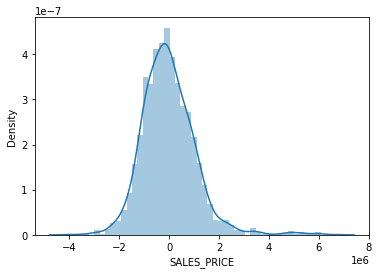

In [81]:
sns.distplot(y_test-predictions)

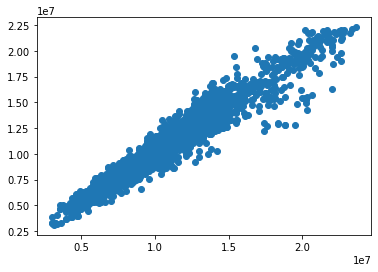

In [82]:
plt.scatter(y_test,predictions)

#### RANDOM FOREST REGRESSOR - METRICS

In [83]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2- SCORE:', metrics.r2_score(y_test,predictions))

MAE: 795848.1147022558
MSE: 1166563222656.3708
RMSE: 1080075.5634011775
R2- SCORE: 0.9238423541760805
